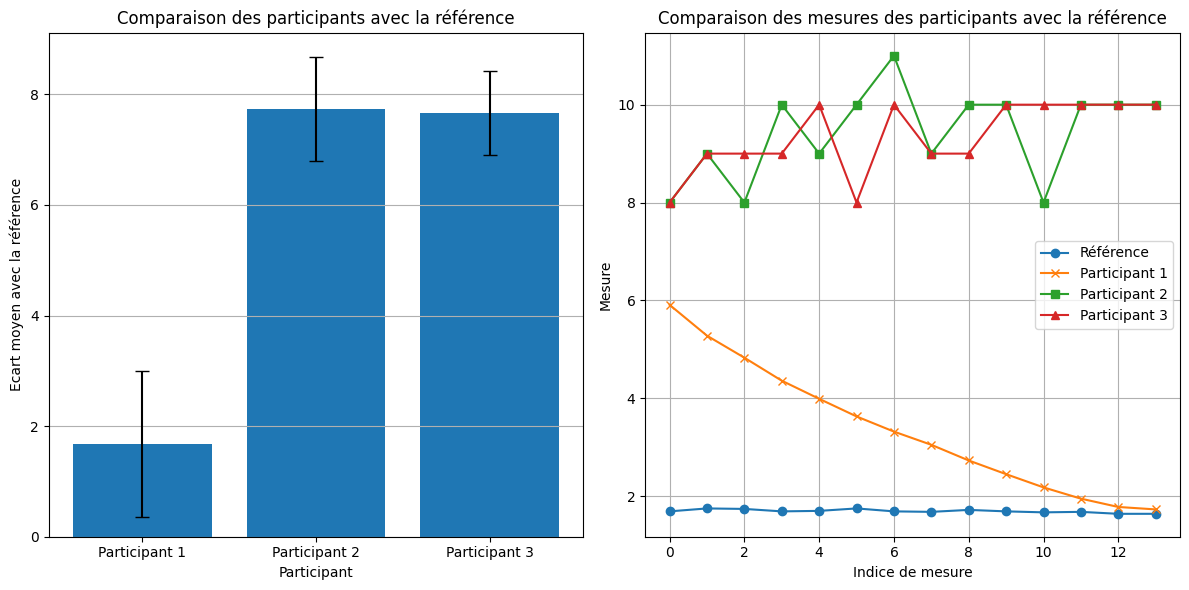

Les résultats montrent que les participants ont des performances variables. Certains participants présentent des écarts moyens faibles avec la référence, tandis que d'autres ont des écarts plus importants. La corrélation entre les résultats des participants et la référence est de : 
Référence        1.000000
Participant 1    0.639302
Participant 2   -0.187376
Participant 3   -0.604334
Name: Référence, dtype: float64
, indiquant une bonne concordance dans l'ensemble. L'incertitude des mesures des participants est estimée à : 
0     1.206662
1     2.147743
2     2.177070
3     3.009407
4     3.220254
5     3.257653
6     4.175420
7     3.435234
8     3.940512
9     4.358995
10    4.062528
11    4.647670
12    4.745819
13    4.774687
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv('/content/Donnees - Donnees.csv')


# Prétraitement des données
# Vérifier la qualité des données
data = data.dropna()  # Éliminer les lignes avec des données manquantes

# Calculer les écarts entre les mesures des participants et la référence
for i in range(1, 4):
    data[f'Ecart_participant_{i}'] = np.abs(data[f'Participant {i}'] - data['Référence'])

# Identifier les participants ayant des performances discordantes
ecarts_moyens = data[['Ecart_participant_1', 'Ecart_participant_2', 'Ecart_participant_3']].mean()
ecarts_std = data[['Ecart_participant_1', 'Ecart_participant_2', 'Ecart_participant_3']].std()

# Évaluer la corrélation entre les résultats des participants et la référence
correlation = data[['Référence', 'Participant 1', 'Participant 2', 'Participant 3']].corr().loc['Référence', :]

# Estimer l'incertitude des mesures des participants
incertitude = data[['Participant 1', 'Participant 2', 'Participant 3']].std(axis=1)

# Visualisation des données
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(['Participant 1', 'Participant 2', 'Participant 3'], ecarts_moyens.values, yerr=ecarts_std.values, capsize=5)
plt.xlabel('Participant')
plt.ylabel('Ecart moyen avec la référence')
plt.title('Comparaison des participants avec la référence')
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.plot(data['Référence'], label='Référence', marker='o')
plt.plot(data['Participant 1'], label='Participant 1', marker='x')
plt.plot(data['Participant 2'], label='Participant 2', marker='s')
plt.plot(data['Participant 3'], label='Participant 3', marker='^')
plt.xlabel('Indice de mesure')
plt.ylabel('Mesure')
plt.title('Comparaison des mesures des participants avec la référence')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Rédiger un paragraphe synthétisant l'analyse
print(f"Les résultats montrent que les participants ont des performances variables. Certains participants présentent des écarts moyens faibles avec la référence, tandis que d'autres ont des écarts plus importants. La corrélation entre les résultats des participants et la référence est de : \n{correlation}\n, indiquant une bonne concordance dans l'ensemble. L'incertitude des mesures des participants est estimée à : \n{incertitude}")

Trairement des sonnées catégoriques